DEPENDENCIES

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

IMPORT THE DATA

In [57]:
car_dataset = pd.read_csv("car_data.csv")
car_dataset.head()
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [58]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [59]:
# check for the categorical values that how many different value it has
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [60]:
#Encoding the Text label into the Number 
car_dataset["Fuel_Type"].replace({"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2} , inplace=True )
car_dataset["Seller_Type"].replace({"Dealer" : 0 , "Individual" : 1} , inplace= True)
car_dataset["Transmission"].replace({"Manual" : 0 , "Automatic" : 1} , inplace= True)
car_dataset.Transmission.value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7508\3903141049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_dataset["Fuel_Type"].replace({"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2} , inplace=True )
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7508\3903141049.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

Transmission
0    261
1     40
Name: count, dtype: int64

SPLIT IN TRAIN TEST

In [61]:
x = car_dataset.drop(columns=["Selling_Price" , "Car_Name"])
y = car_dataset["Selling_Price"]
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.2 , random_state= 2)

TRAINING THE MODEL

In [62]:
model = LinearRegression()
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


EVALUATION

In [63]:
train_data_pred = model.predict(x_train)
r2_score_predict = metrics.r2_score(y_train , train_data_pred)
print("R2 prediction of the model is :- " , r2_score_predict)

R2 prediction of the model is :-  0.8838169193709792


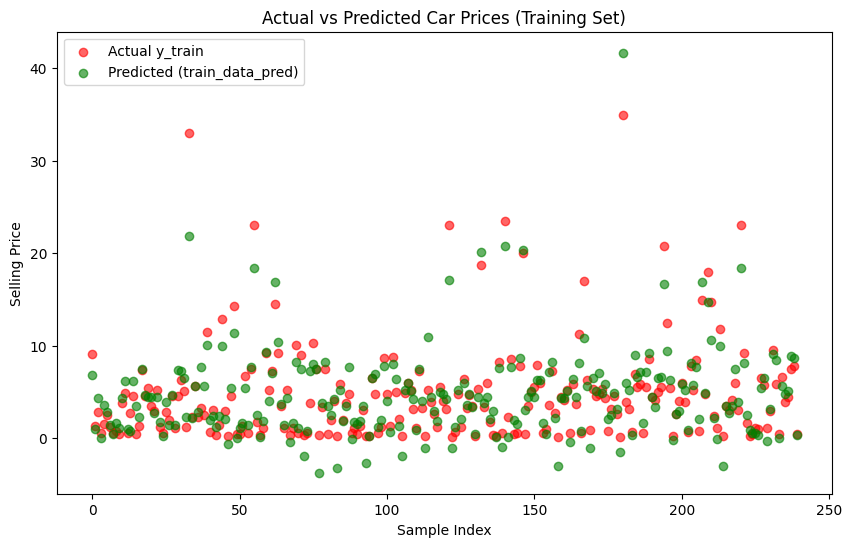

In [64]:
# Visualize Actual vs Predicted values for training data
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_train)), y_train, color='red', label='Actual y_train', alpha=0.6)
plt.scatter(range(len(train_data_pred)), train_data_pred, color='green', label='Predicted (train_data_pred)', alpha=0.6)
plt.title('Actual vs Predicted Car Prices (Training Set)')
plt.xlabel('Sample Index')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

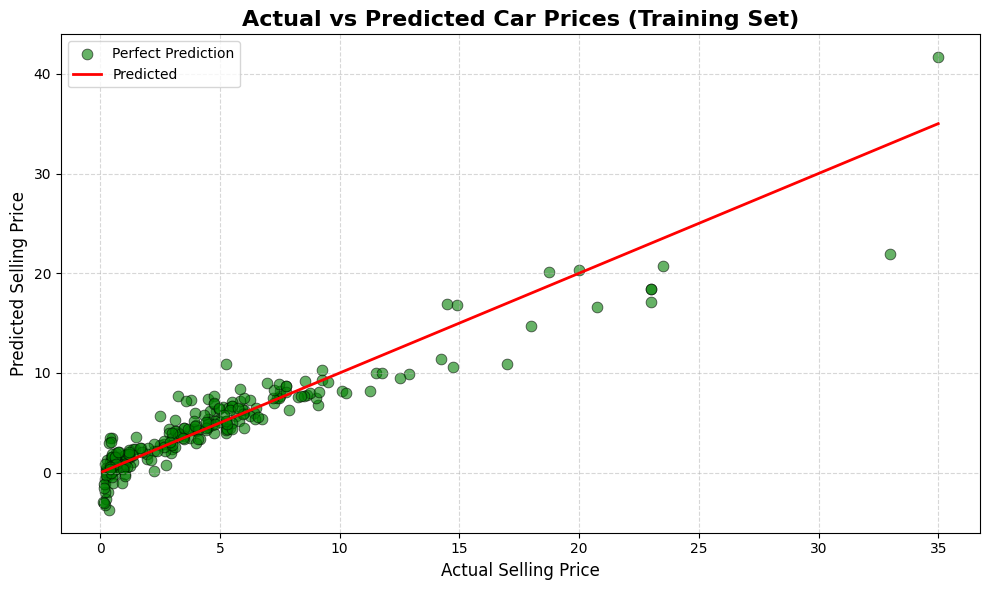

In [65]:
# Best looking chart using seaborn
import seaborn as sns

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': train_data_pred
})

plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_df, color='green', alpha=0.6, s=60, edgecolor='k')
sns.lineplot(x='Actual', y='Actual', data=plot_df, color='red', label='Perfect Prediction', linewidth=2)
plt.title('Actual vs Predicted Car Prices (Training Set)', fontsize=16, fontweight='bold')
plt.xlabel('Actual Selling Price', fontsize=12)
plt.ylabel('Predicted Selling Price', fontsize=12)
plt.legend(['Perfect Prediction', 'Predicted'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

VISULAIE THE ACTUAL PRICE VS PREDICTED PRICES

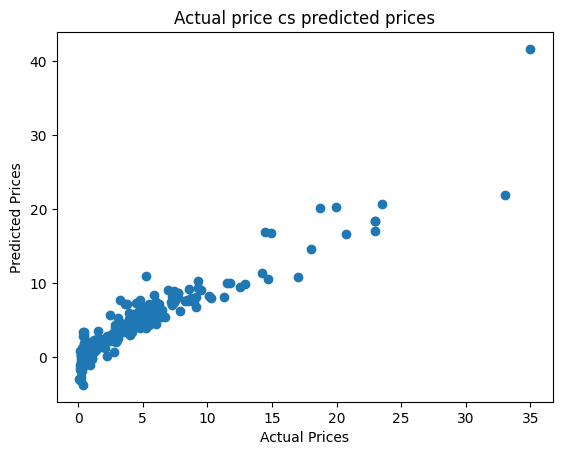

In [66]:
plt.scatter(y_train , train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price cs predicted prices")
plt.show()

EVALUATION BASED ON THE TEST DATA

In [67]:
test_data_predict = model.predict(x_test)
test_data_r2 = metrics.r2_score(y_test , test_data_predict)
print(test_data_r2)

0.8401532365378521


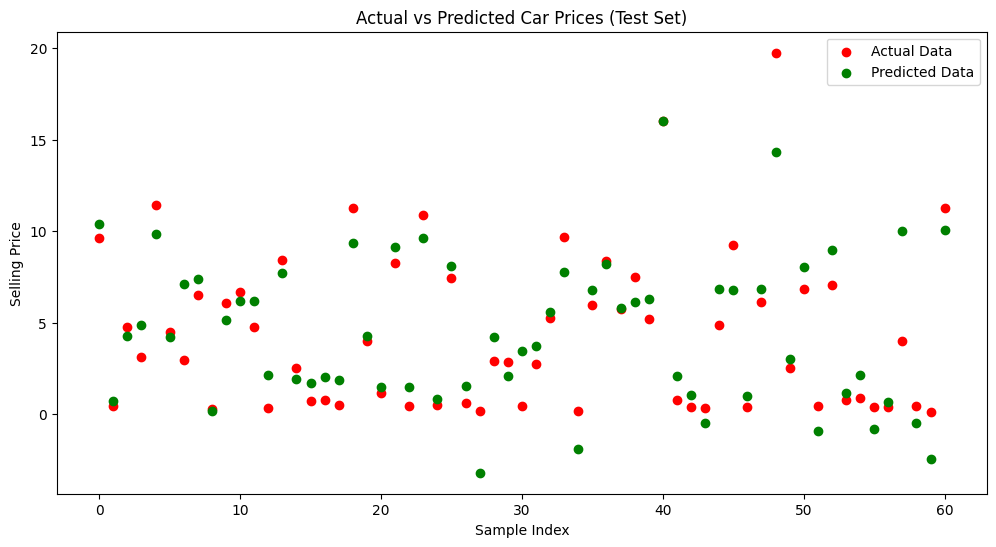

In [68]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)) , y_test , color = "red" , label="Actual Data")
plt.scatter(range(len(test_data_predict)) , test_data_predict , color = "green" , label = "Predicted Data")
plt.legend()
plt.title('Actual vs Predicted Car Prices (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Selling Price')
plt.show()

<Axes: >

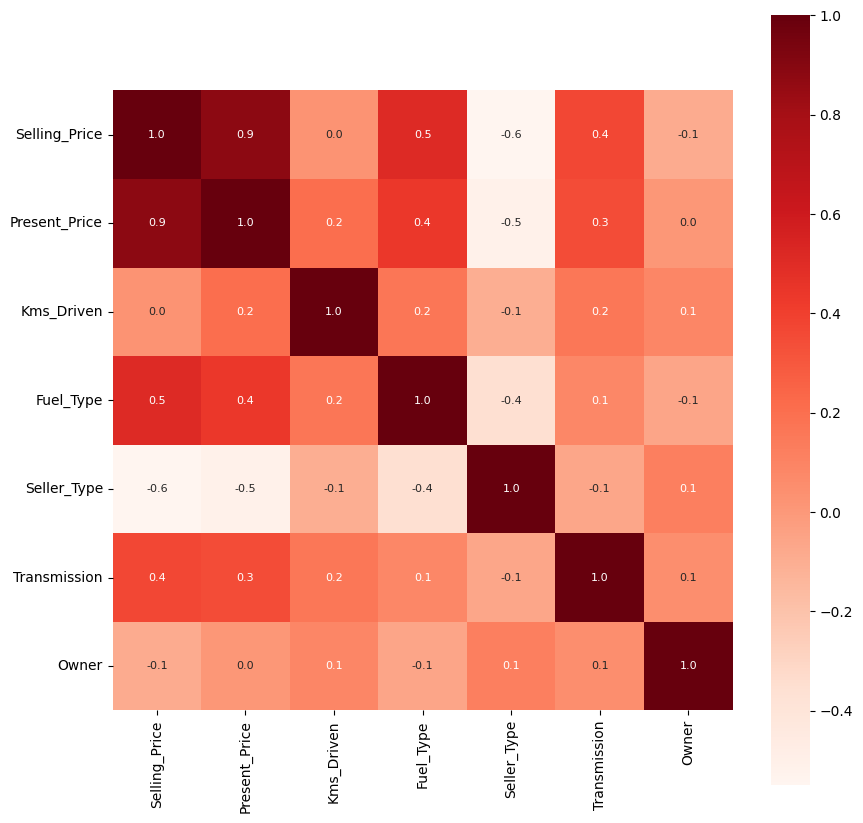

In [ ]:
#Heat map should only have numerical values not text values


x = car_dataset.drop(columns=["Car_Name" , "Year"])
corr_metrics = x.corr()

plt.figure(figsize=(10,10))
# sns.heatmap(corre_matrics , cbar= True , square= True , fmt = ".1f" , annot= True , annot_kws= {"size" : 8} , cmap="Greens")
sns.heatmap(corr_metrics , cbar=True , square= True , annot= True , fmt=".1f" , annot_kws= {"size" : 8} , cmap="Reds")

LASSO REGRESSION

In [75]:
lass_model = Lasso()
lass_model.fit(x_train , y_train)
train_data_pred = lass_model.predict(x_train)
r2_score_predict = metrics.r2_score(y_train , train_data_pred)
print("R2 prediction of the model is :- " , r2_score_predict)

R2 prediction of the model is :-  0.843587395258283


In [76]:
test_data_pred = lass_model.predict(x_test)
r2_score_predict = metrics.r2_score(y_test , test_data_pred)
print("R2 prediction of the model is :- " , r2_score_predict)

R2 prediction of the model is :-  0.8497457570738539
